# CC5215: Privacidad de Datos

## Laboratorio 5

Integrantes:

- Nombre: Diego Ignacio Espinoza Núñez

In [2]:
# Load the data and libraries
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

adult = pd.read_csv('https://users.dcc.uchile.cl/~mtoro/cursos/cc5215/adult_with_pii.csv')

In [3]:
adult

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Ardyce Golby,10/29/1961,212-61-8338,41328,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Jean O'Connor,6/28/1952,737-32-2919,94735,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Reuben Skrzynski,8/9/1966,314-48-0219,49628,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Caye Biddle,5/19/1978,647-75-3550,8213,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



**Note**: this function (and the rest of the ones you'll define in this assignment) take a list of *query results* rather than the queries themselves (as we saw in class). This simplification makes your code a little bit simpler.

In [4]:
# preserves epsilon-differential privacy
def above_threshold(query_results, T, epsilon):
    T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)

    for idx, q in enumerate(query_results):
        nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
        if q + nu_i >= T_hat:
            return idx
    return None

## Question 1 (5 points)

The code below defines a finite set of options for marital status. Define a scoring function that returns high scores for common marital statuses, and low scores for uncommon ones (e.g. the score could be the number of people with that status). Remember that your function should be 1-sensitive.

In [5]:
options = ['Never-married', 'Married-civ-spouse', 'Divorced',
           'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
           'Widowed']


def score(option):
    """Esta función toma los estados maritales de las personas y 
    calcula todos el conteo para todos los diferentes tipos de 
    estados maritales. Además, este mecanismo tiene una sensibilidad
    de 1, porque si agregamos o quitamos una persona o registro, el 
    resultado de la consulta cambia a lo más en uno, bajo la distancia
    de Hamming."""
    score = 0
    for row in np.arange(len(adult)):
        marital_status = adult['Marital Status']
        if marital_status[row] == option:
            score += 1
    return score

score('Never-married')


10683

In [6]:
assert score('Never-married') > score('Divorced')
assert score('Never-married') > score('Widowed')
assert score('Never-married') < score('Married-civ-spouse')
assert score('Never-married') > score('Divorced')

## Question 2 (10 points)

Implement `report_noisy_max` using the Laplace mechanism. `report_noisy_max` should return the value in a set that approximately maximizes the value of the score function. It should not return the score itself.

In [7]:
def report_noisy_max(R, score, sensitivity, epsilon):
    """Esta función lo que hace es retornar el máximo 
    puntaje ruidoso u(r) + Lap(sensitivity, epsilon), 
    donde r = score(R[i]) es el score para
    cada tipo de dato único, mientras que sensitivity
    y epsilon son los parámetros de la función de
    Laplace. R es el conjunto de opcion/opciones. 
    """
    noisy_scores = []
    for opt in R:
        u = score(opt)
        noise = np.random.laplace(loc = 0.0, scale= sensitivity / epsilon)
        noisy_scores.append(u + noise)

    max_index = np.argmax(noisy_scores)
    return R[max_index]
    raise NotImplementedError()

report_noisy_max(options, score, 1, 1)

'Married-civ-spouse'

In [8]:
assert report_noisy_max(options, score, 1, 1) == 'Married-civ-spouse'

## Question 3 (5 points)

Implement a function `above_10000` that releases the **value** of the first query in a sequence of queries whose value is above 10000. Your function should have a **total** privacy cost equal to the privacy parameter $\epsilon$ passed in when it is called.

In [9]:
def above_10000(query_results, epsilon):
    """
    Aplica la técnica del Vector Disperso (SVT) para devolver el 
    primer resultado que supera 10000, asegurando privacidad diferencial ε.
    
    Parámetros:
        query_results: lista de resultados (reales) de consultas.
        epsilon: presupuesto de privacidad total.

    Retorna:
        El primer resultado que supera 10000 (de manera privada), o None.
    """
    #definimos primero que todo la cantidad de consultas:
    k = len(query_results)
    # Por definición, aseguramos que el mecanismo es epsilon diferencialmente
    # privado, porque la suma de epsilon_1 + k * epsilon_2 es igual a epsilon:
    epsilon_1 = epsilon / 2
    epsilon_2 = epsilon / (2 * k)
    sensitivity = 1
    # Computamos un umbral (threshold) ruidoso (noisy):
    noisy_threshold = 10000 + np.random.laplace(loc=0.0, scale=sensitivity/epsilon_1)

    for result in query_results:
        # Agregamos ruido a cada consulta para compararla con el umbral
        noisy_result = result + np.random.laplace(loc = 0.0, scale=sensitivity/epsilon_2)
        if noisy_result > noisy_threshold:
            # Devolver el valor real (no ruidoso), ya que SVT permite eso una vez
            return result

    # Y si ninguna consulta supera el umbral no devolvemos nada. 
    return None


queries = adult['Marital Status'].value_counts()
print(f"above_10000 #1: {above_10000(queries, 100)}")
print(f"above_10000 #2: {above_10000(queries, 1)}")
print(f"above_10000 #3: {above_10000(queries, .01)}")

above_10000 #1: 14976
above_10000 #2: 14976
above_10000 #3: 14976


In [10]:
# TEST CASE

results = [above_10000(queries, 1.0) for _ in range(20)]
print(np.mean(results))
assert np.mean(results) > 14900
assert np.mean(results) < 15000

14976.0


## Question 4 (5 points)
In 2-3 sentences, argue informally that your implementation of `above_10000` has a total privacy cost of $\epsilon$.

YOUR ANSWER HERE
---
Mi implementación de la función above_10000 garantiza un costo de privacidad de epsilon porque sigue el esquema del Sparse Vector Technique bajo un presupuesto controlado: En primer lugar, la perturbación del umbral utiliza un costo de privacidad de $$\epsilon_1 = \frac{\epsilon}{2}$$ (de lo cual se agrega un ruido de Laplace de 
$\frac{1}{\epsilon_1}$ ) lo cual garantiza privacidad diferencial respecto al umbral, que es un valor sensible si depende de los datos. En segundo lugar, a cada consulta k-ésima se le agrega un ruido Laplace con escala $\frac{1}{\epsilon_2}$ donde cada $\epsilon_2 = \frac{\epsilon}{2k}$, y por el teorema de composición secuencial, las privacidades de todo el mecanismo se suman, entonces el $$\epsilon_{\text{Total}} = \epsilon_1 + k \cdot \epsilon_2 = \frac{\epsilon}{2} + k\cdot \frac{\epsilon}{2k} = \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon $$, donde $k$ viene siendo la cantidad de consultas. 

## Question 5 (10 points)

Implement a function `bounded_all_above_10000` that releases the **value** of **$c$ queries** in a sequence of queries whose value is above 10000 (where $c$ is an analyst-provided parameter limiting the number of returned results). Your function should have a **total privacy cost** bounded by its parameter $\epsilon$.

In [11]:
import numpy as np

def bounded_all_above_10000(query_results, c, epsilon):
    """
    Devuelve hasta 'c' valores de la secuencia de queries que superan el umbral 10000,
    utilizando una versión acotada de Sparse Vector Technique (SVT), con privacidad total ε.
    
    Parámetros:
    - query_results: lista de resultados (valores reales) de consultas.
    - epsilon: presupuesto total de privacidad.
    - c: número máximo de resultados permitidos por encima del umbral.

    Retorna:
    - Una lista con hasta c valores de queries que están por encima del umbral.
    """

    # Primero que todo, dividimos el presupuesto ε en dos partes
    epsilon_threshold = epsilon / 2
    epsilon_query = epsilon / (2 * c)

    threshold = 10000
    # luego agregamos ruido al umbral para garantizar privacidad del umbral
    noisy_threshold = threshold + np.random.laplace(loc=0.0, scale=1/epsilon_threshold)

    results = []
    count = 0

    for query in query_results:
        # no queremos que la cuenta pase el
        # máximo de respuestas permitidas.
        if count >= c:
            break

        # añadimos ruido Laplace a la query
        noisy_query = query + np.random.laplace(loc=0.0, scale=1/epsilon_query)

        # comparamos query ruidosa con el umbral ruidoso
        if noisy_query > noisy_threshold:
            results.append(query)  # y por último publicamos el valor verdadero (no ruidoso)
            count += 1

    return results


queries = list(adult['Marital Status'].value_counts())
print(f"bounded_all_above_10000 #1: {bounded_all_above_10000(queries, 3, 100)}")
print(f"bounded_all_above_10000 #2: {bounded_all_above_10000(queries, 3, 1)}")
print(f"bounded_all_above_10000 #3: {bounded_all_above_10000(queries, 3, .01)}")

bounded_all_above_10000 #1: [14976, 10683]
bounded_all_above_10000 #2: [14976, 10683]
bounded_all_above_10000 #3: [14976]


In [12]:
# TEST CASE

results = [bounded_all_above_10000(queries, 2, 1.0)]
results_1 = [r[0] for r in results]
results_2 = [r[1] for r in results]

assert np.mean(results_1) > 14900
assert np.mean(results_1) < 15000
assert np.mean(results_2) > 10600
assert np.mean(results_2) < 10700

## Question 6 (5 points)

In 2-3 sentences, argue informally that your implementation of `bounded_all_above_10000` has privacy cost bounded by $\epsilon$.

YOUR ANSWER HERE
---

La privacidad diferencial se compone usando el **teorema de composición**, que indica que cuando se aplican múltiples mecanismos diferenciales sobre la misma base de datos, sus costos de privacidad se **suman**. Por un lado, se reserva la mitad del presupuesto para proteger el **umbral**: $\varepsilon_{\text{umbral}} = \frac{\varepsilon}{2}$. En segundo lugar, la otra mitad se reparte entre a lo más "c" comparaciones (el número máximo de valores que podemos publicar) $\varepsilon_{\text{consulta}} = \frac{\varepsilon}{2c}$. Si se activan exactamente "c" respuestas (es decir, se publican "c" valores de consultas), entonces el costo total es (dado que son mecanismos que operan sobre la misma base de datos):
$$
\varepsilon_{\text{total}} = \varepsilon_{\text{umbral}} + c \cdot \varepsilon_{\text{consulta}}=
\underbrace{\frac{\varepsilon}{2}}_{\text{umbral}} + \underbrace{c \cdot \frac{\varepsilon}{2c}}_{\text{hasta } c \text{ comparaciones}} = \frac{\varepsilon}{2} + \frac{\varepsilon}{2} = \varepsilon
$$
Esto garantiza que la función bounded_all_above_10000 sea **ε-diferencialmente privada**. Además, si se publican menos de "c" respuestas, el costo total sería incluso menor a $\epsilon$.


## Question 7 (15 points)

Implement a function `mean_age` that computes the mean age of participants in the `adult_data` dataset. Your function should have a **total** privacy cost of $\epsilon$. It should work as follows:

1. Compute an *upper* clipping parameter based on the data
2. Clip the data using the clipping parameter
3. Use `laplace_mech` to release a differentially private mean of the clipped data

*Hint*: Use the sparse vector technique (`above_threshold`) to compute the clipping parameter. Consider using a sequence of queries that looks like `df.clip(lower=b, upper=0).sum() - df.clip(lower=b+1, upper=0).sum()`.

*Hint*: Be careful of sensitivities and set the scale of the noise accordingly!

Sea $$ \mathbf{x} = (x_1, x_2, \dots, x_n) \in \mathbb{R}^n $$ un conjunto de datos (por ejemplo, edades). Queremos liberar un promedio privado usando selección de clipping automático.

1. Definimos conteos acumulados:

$$
q_j := \sum_{i=1}^n \mathbb{1}_{x_i \leq b_j}
$$

2. Definimos el umbral objetivo (en nuestro caso la variable se llama threshold y es 1% de n):

$$
T := \alpha \cdot n
$$

3. Agregamos ruido Laplace (ambas son respectivamente noisy_query y noisy_threshold, calculadas por la función above_threshold):

$$
\tilde{q}_j := q_j + \eta_j, \quad \eta_j \sim \text{Lap}\left( \frac{1}{\varepsilon_q} \right)
$$
$$
\tilde{T} := T + \eta_T, \quad \eta_T \sim \text{Lap}\left( \frac{1}{\varepsilon_T} \right)
$$

4. Seleccionamos el clipping (en nuestro caso es clip_max):

$$
b := \min \left\{ b_j \in \mathcal{B} \;\middle|\; \tilde{q}_j > \tilde{T} \right\}
$$

5. Finalmente, liberamos el promedio recortado con ruido (en nuestro caso es noisy_mean):

$$
\tilde{\mu} = \frac{1}{n} \sum_{i=1}^n \min(x_i, b) + \text{Lap}\left( \frac{b}{n \varepsilon} \right)
$$


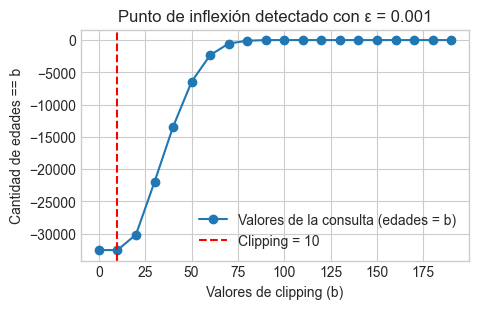

epsilon: 0.001, mean age: 9.859704256672702


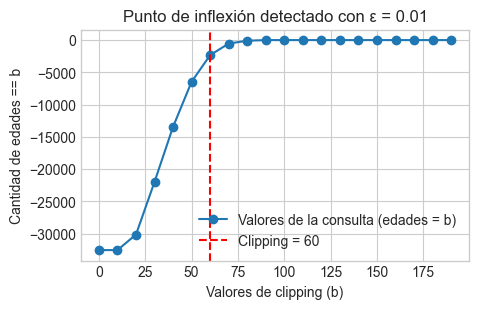

epsilon: 0.01, mean age: 38.74562870718375


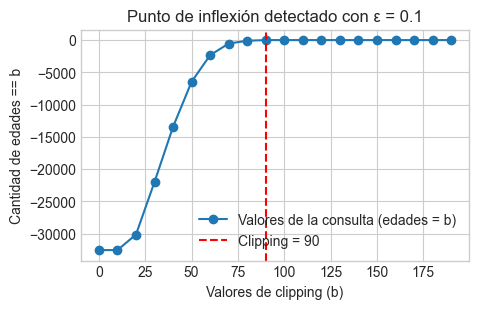

epsilon: 0.1, mean age: 38.51275065010859


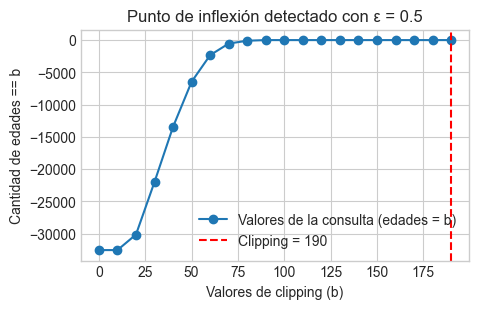

epsilon: 0.5, mean age: 38.580040405462164


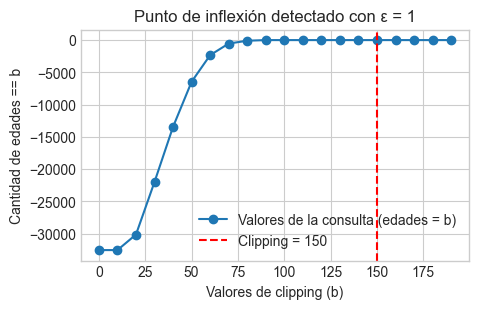

epsilon: 1, mean age: 38.57651438477898


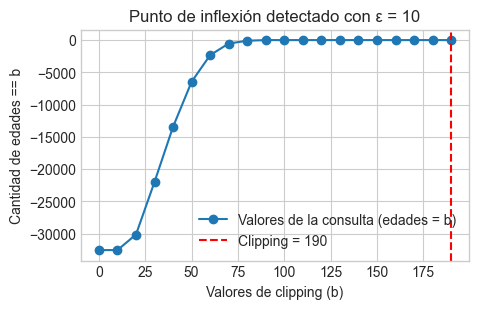

epsilon: 10, mean age: 38.58231660200162


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def Laplace_mechanism(value, sensitivity, epsilon):
    """
    Aplica el mecanismo de Laplace agregando ruido calibrado a la sensibilidad de la consulta.
    
    Inputs: 
        value (float): es el valor numérico al que se le agregará el ruido (por ejemplo, una media).
        sensitivity (float): sensibilidad de la consulta (qué tanto cambia el valor si una persona entra/sale del dataset).
        epsilon (float): presupuesto o costo de privacidad (a menor epsilon, mayor privacidad y más ruido).
        
    Output:
        float: el valor perturbado con ruido de Laplace.
    """
    noise = np.random.laplace(loc=0.0, scale=sensitivity / epsilon)  # se genera el ruido laplaciano
    return value + noise  # se retorna el valor perturbado

def above_threshold(query_results, threshold, epsilon):
    """
    Implementa el algoritmo "Sparse Vector Technique (SVT)" para detectar el primer índice 
    donde una consulta con ruido supera un umbral también perturbado con ruido.
    
    Inputs:
        query_results (list of float): resultados de una secuencia de consultas.
        threshold (float): es el límite o umbral de decisión (por ejemplo, 5% del total de datos).
        epsilon (float): presupuesto total de privacidad.
    
    Output:
        i: índice de la primera consulta cuya versión ruidosa supera el umbral ruidoso.
             Si ninguna lo supera, se devuelve el último índice.
    """
    epsilon_threshold = epsilon / 2  # se reserva la mitad del presupuesto para el umbral
    epsilon_query = epsilon / (2 * len(query_results))  # y se divide la otra mitad entre las consultas

    noisy_threshold = Laplace_mechanism(threshold, sensitivity=1, epsilon=epsilon_threshold)

    for i, query in enumerate(query_results):
        noisy_query = Laplace_mechanism(query, sensitivity=1, epsilon=epsilon_query)
        if noisy_query > noisy_threshold:
            return i  # si el valor con ruido supera el umbral, se devuelve el índice

    return len(query_results) - 1  # si ningún valor superó el umbral, se devuelve el último índice

# bs representa los posibles valores máximos de clipping que evaluaremos
bs = list(range(0, 200, 10))  # se consideran edades desde 0 hasta 190 en pasos de 10

# df son las edades reales del conjunto de datos "adult"
df = adult['Age']

def mean_age(epsilon, do_plot=True):
    """
    Calcula la edad promedio usando un mecanismo diferencialmente privado.
    Usa la técnica Sparse Vector Technique (SVT) para seleccionar un valor óptimo de clipping,
    y luego aplica el mecanismo de Laplace a la media recortada.
    
    Inputs:
        epsilon (float): presupuesto total de privacidad para toda la función.
        do_plot (bool, optional): si es True (por defecto), se muestra una gráfica con el punto de inflexión.
    
    Outputs:
        noisy_mean (float): valor de la edad promedio con ruido de privacidad diferencial.
    """
    clipping_values = bs  # lista de valores máximos posibles para clipping
    ages = df
    queries = []

    # Para cada valor de clipping b, contamos cuántas edades son exactamente iguales a b
    for clip_value in clipping_values:
        equal_age = ages.clip(lower=clip_value, upper=0).sum()
        greater_age = ages.clip(lower=clip_value+1, upper=0).sum()
        query = equal_age - greater_age 
        queries.append(query)

    # Usamos un threshold que representa el 1% del total de datos como criterio de corte
    threshold = 0.01 * len(ages)

    # Aplicamos Sparse Vector Technique para encontrar el índice del valor de clipping adecuado
    index = above_threshold(queries, threshold, epsilon / 2)  # solo usamos la mitad del presupuesto aquí
    clip_max = clipping_values[index]  # este será el valor máximo para hacer clipping

    # recortamos las edades para que ninguna supere el clip_max
    clipped_ages = ages.clip(upper=clip_max)

    # Sensibilidad de la media: el cambio máximo que puede provocar una persona en la media
    sensitivity = clip_max / len(clipped_ages)

    # calculamos la media recortada y se le añade ruido Laplaciano
    noisy_mean = Laplace_mechanism(clipped_ages.mean(), sensitivity, epsilon / 2)  # la otra mitad del presupuesto

    if do_plot == True:
        plt.figure(figsize=(5, 3))
        plt.plot(clipping_values, queries, marker='o', label='Valores de la consulta (edades = b)')
        plt.axvline(clip_max, color='r', linestyle='--', label=f'Clipping = {clip_max}')
        plt.title(f'Punto de inflexión detectado con ε = {epsilon}')
        plt.xlabel('Valores de clipping (b)')
        plt.ylabel('Cantidad de edades == b')
        plt.legend()
        plt.grid(True)
        plt.show()

    return noisy_mean

for epsilon in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    print(f"epsilon: {epsilon}, mean age: {mean_age(epsilon, do_plot=True)}")


In [14]:
# TEST CASE
results = [mean_age(1.0, False) for _ in range(20)]
assert np.mean(results) > 38
assert np.mean(results) < 39

## Question 8 (5 points)

In 3-5 sentences, describe your approach to implementing `mean_age` and argue informally that your implementation has privacy cost bounded by $\epsilon$.

YOUR ANSWER HERE
---
Lo que podemos decir es que usamos la mitad del presupuesto para el cálculo del índice de la primera consulta que supera el umbral, y la otra mitad del presupuesto para el cálculo de la consulta clippeada con ruido laplaciano. Además, podemos decir que el cálculo del índice haya repartido mitad y mitad su parte del presupuesto entre el ruido del umbral y el ruido de la consulta. Entonces, el epsilon total será:
$$\epsilon_{Total} = \epsilon_{\text{promedio clippeado}} + \epsilon_{\text{índice}} = \epsilon_{\text{promedio clippeado}} + (\epsilon_{\text{query's}} + \epsilon_{\text{threshold}}) = \frac{\epsilon}{2} + (\frac{\epsilon}{4} + \frac{\epsilon}{4}) = \epsilon$$